Conector a la base de datos.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar a la base de datos
conn = mysql.connector.connect(
    host='6.tcp.ngrok.io',
    port='14764',
    user='camilo',
    password='nueva_contrasea',
    database='steam'
)

Cargar los datos de las tres tablas:

In [6]:
user_playtime = pd.read_sql("SELECT * FROM user_playtime", conn)
games = pd.read_sql("SELECT * FROM games", conn)
reviews = pd.read_sql("SELECT * FROM reviews", conn)

C:\Users\kcasi\AppData\Local\Temp\ipykernel_12564\3507143509.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  user_playtime = pd.read_sql("SELECT * FROM user_playtime", conn)


Exploración inicial de los datos:

In [7]:
print(user_playtime.head())
print(games.head())
print(reviews.head())

print(user_playtime.describe())
print(games.describe())
print(reviews.describe())

        user_id  item_id  playtime_forever  playtime_2weeks
0  ___Plasma___      730                26               26
1  ___Plasma___     2700               137                0
2  ___Plasma___    10090               302                0
3  ___Plasma___    11390                37                0
4  ___Plasma___    13520                 0                0
   id         developer release_date      genres  \
0  10             Valve   2000-11-01  ["Action"]   
1  20             Valve   1999-04-01  ["Action"]   
2  30             Valve   2003-05-01  ["Action"]   
3  40             Valve   2001-06-01  ["Action"]   
4  50  Gearbox Software   1999-11-01  ["Action"]   

                                                tags  price  
0  ["Action", "FPS", "Multiplayer", "Shooter", "C...   9.99  
1  ["Action", "FPS", "Multiplayer", "Classic", "S...   4.99  
2  ["FPS", "World War II", "Multiplayer", "Action...   4.99  
3  ["Action", "FPS", "Multiplayer", "Classic", "S...   4.99  
4  ["FPS", "Actio

Identificar datos faltantes:

In [8]:
print(user_playtime.isnull().sum())
print(games.isnull().sum())
print(reviews.isnull().sum())

user_id             0
item_id             0
playtime_forever    0
playtime_2weeks     0
dtype: int64
id              0
developer       0
release_date    0
genres          0
tags            0
price           0
dtype: int64
id_review             0
item_id               0
helpful               0
recommend             0
sentiment_analysis    0
dtype: int64


Detectar duplicados:

In [20]:

print("Duplicados en user_playtime:", user_playtime.duplicated().sum())
print("Duplicados en games:", games.duplicated().sum())
print("Duplicados en reviews:", reviews.duplicated().sum())

Duplicados en user_playtime: 0
Duplicados en games: 0
Duplicados en reviews: 0


Análisis de tipos de datos


In [25]:

print(user_playtime.dtypes)
print(games.dtypes)
print(reviews.dtypes)

user_id             object
item_id              int64
playtime_forever     int64
playtime_2weeks      int64
dtype: object
id                int64
developer        object
release_date     object
genres           object
tags             object
price           float64
dtype: object
id_review             int64
item_id               int64
helpful               int64
recommend             int64
sentiment_analysis    int64
dtype: object


In [26]:
# Análisis estadístico
print(user_playtime.describe())
print(games.describe())
print(reviews.describe())

            item_id  playtime_forever  playtime_2weeks
count  5.094082e+06      5.094082e+06     5.094082e+06
mean   1.783915e+05      9.905070e+02     9.065389e+00
std    1.318514e+05      5.414098e+03     1.402838e+02
min    1.000000e+01      0.000000e+00     0.000000e+00
25%    3.445000e+04      0.000000e+00     0.000000e+00
50%    2.144200e+05      3.400000e+01     0.000000e+00
75%    2.664300e+05      3.550000e+02     0.000000e+00
max    5.307200e+05      6.427730e+05     1.996700e+04
                 id         price
count  2.252700e+04  22527.000000
mean   4.307248e+05      8.966739
std    1.918433e+05     15.415299
min    1.000000e+01      0.000000
25%    3.023150e+05      2.990000
50%    4.269290e+05      4.990000
75%    5.807050e+05      9.990000
max    2.028850e+06    995.000000
          id_review        item_id       helpful     recommend  \
count  59305.000000   59305.000000  59305.000000  59305.000000   
mean   29653.000000  169935.176511     28.104072      0.884799   
s

Verificar la recomendación de juegos:

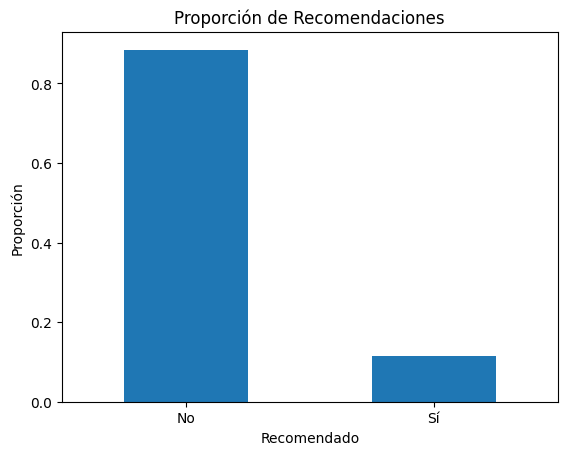

In [ ]:
recommendation_ratio = reviews['recommend'].value_counts(normalize=True)
recommendation_ratio.plot(kind='bar')
plt.title('Proporción de Recomendaciones')
plt.xlabel('Recomendado')
plt.ylabel('Proporción')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'], rotation=0)
plt.show() 